In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Load and prepare the data
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows
print("Dataset Overview:")
display(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
display(df.info())

Dataset Overview:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    int64   
 5   species            150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


None

Training set size: (120, 4)
Testing set size: (30, 4)


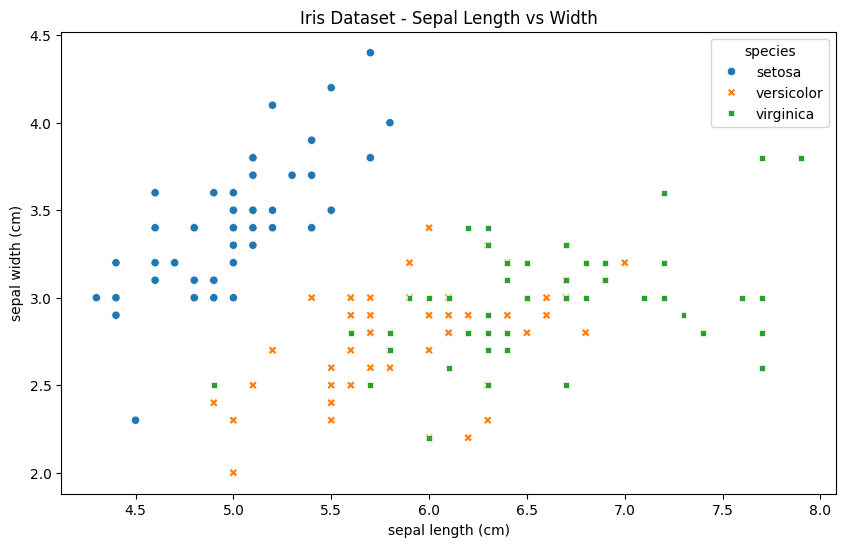

In [3]:
# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Create a visualization of the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', style='species')
plt.title('Iris Dataset - Sepal Length vs Width')
plt.show()

In [4]:
# Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'k-NN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    # Print results
    print(f"\nResults for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))


Results for Logistic Regression:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Results for k-NN:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Re

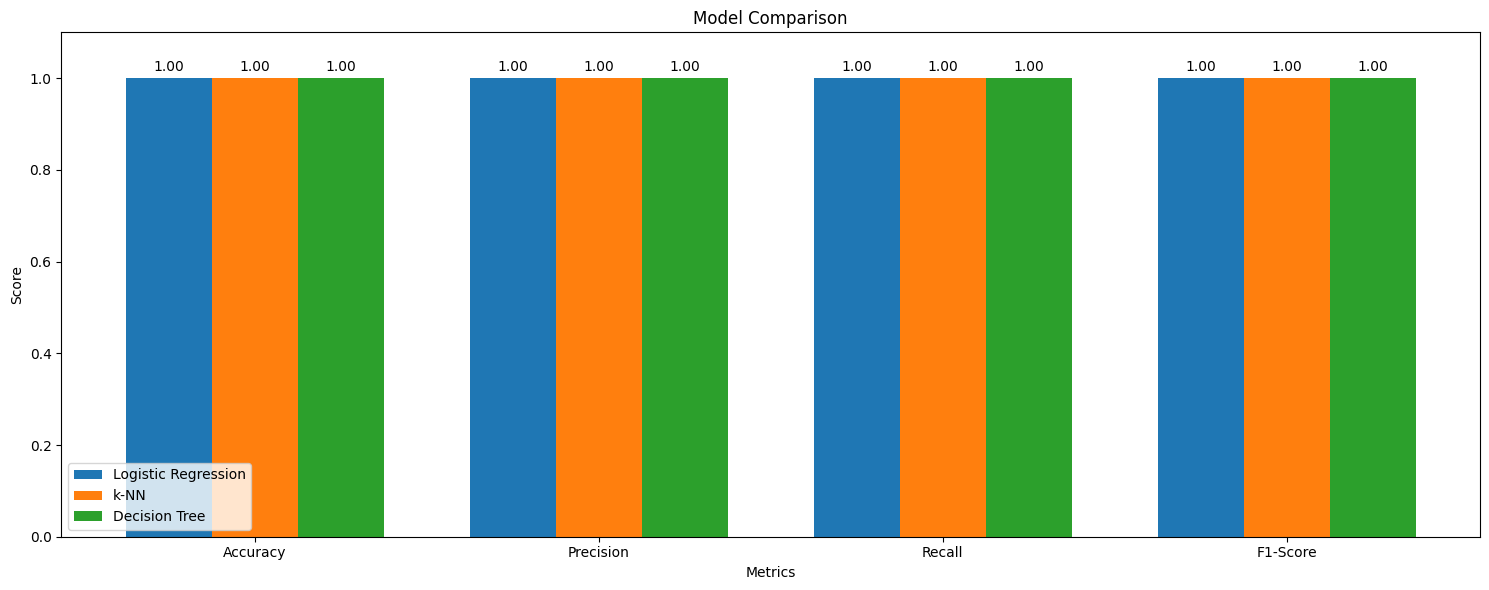


Model Comparison Summary:
--------------------------------------------------

Logistic Regression:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

k-NN:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Decision Tree:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [5]:
# Create visualization of results
plt.figure(figsize=(15, 6))

# Create bar plot for model comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.25

for i, (model_name, scores) in enumerate(results.items()):
    plt.bar(x + i*width, list(scores.values()), width, label=model_name)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x + width, metrics)
plt.legend()
plt.ylim(0, 1.1)  # Set y-axis limit from 0 to 1.1 for better visualization

# Add value labels on top of each bar
for i, (model_name, scores) in enumerate(results.items()):
    for j, value in enumerate(scores.values()):
        plt.text(x[j] + i*width, value + 0.01, f'{value:.2f}', 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print final comparison summary
print("\nModel Comparison Summary:")
print("-" * 50)
for model_name, scores in results.items():
    print(f"\n{model_name}:")
    for metric, value in scores.items():
        print(f"{metric}: {value:.4f}")